In [1]:
# 📦 Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import seaborn as sns

In [ ]:

df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/supplement.csv")

In [ ]:

df.drop(['ID'], axis=1, inplace=True)

In [ ]:

print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store_id       188340 non-null  int64  
 1   Store_Type     188340 non-null  object 
 2   Location_Type  188340 non-null  object 
 3   Region_Code    188340 non-null  object 
 4   Date           188340 non-null  object 
 5   Holiday        188340 non-null  int64  
 6   Discount       188340 non-null  object 
 7   #Order         188340 non-null  int64  
 8   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 12.9+ MB
None
            Store_id        Holiday         #Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415   18456.708302
min         1.000000       0.000000       0.000000       0.0000

In [ ]:

df['Discount'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[0])
ax[0].set_title('Discount Distribution')
ax[0].set_ylabel('')

Text(4.444444444444452, 0.5, '')

In [ ]:

df['Store_Type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax[1])
ax[1].set_title('Store Type Distribution')
ax[1].set_ylabel('')

Text(596.2626262626262, 0.5, '')

In [8]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:

categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:

df.drop(['Date'], axis=1, inplace=True)

In [ ]:

X = df.drop(['#Order'], axis=1)
y = df['#Order']

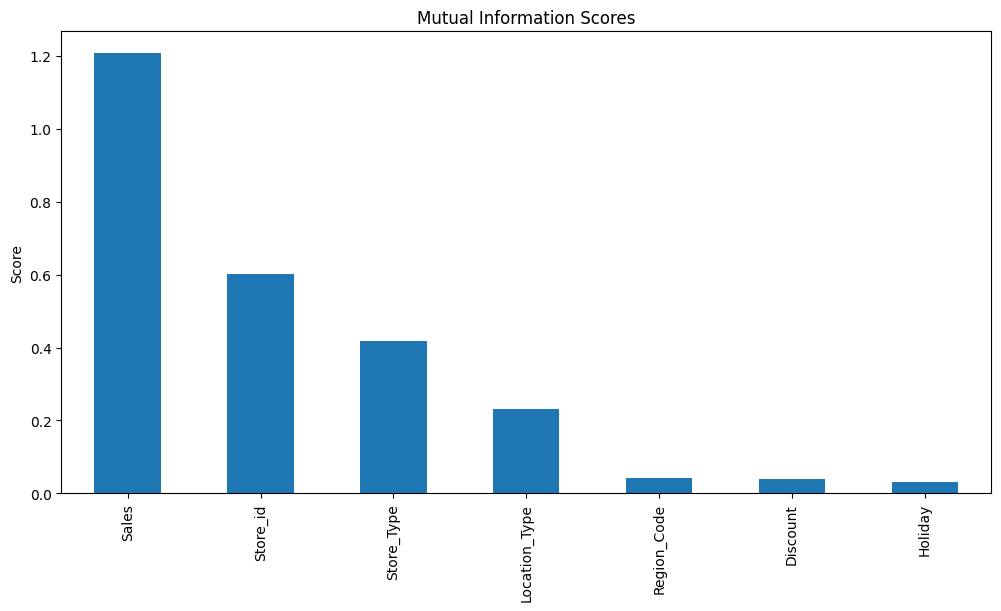

In [ ]:

mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns)
mi_series.sort_values(ascending=False).plot.bar(figsize=(12,6), title="Mutual Information Scores")
plt.ylabel("Score")
plt.show()

In [ ]:

X.drop(['Sales'], axis=1, inplace=True)

In [ ]:

selector = SelectKBest(mutual_info_classif, k=3)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
X_selected = X[selected_features]

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:

model = lgb.LGBMRegressor()
model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 150672, number of used features: 3
[LightGBM] [Info] Start training from score 68.163401


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [ ]:

y_pred = model.predict(x_test)

In [18]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 13.04000948612964
MSE: 349.37746389930606
R² Score: 0.6240655975798164


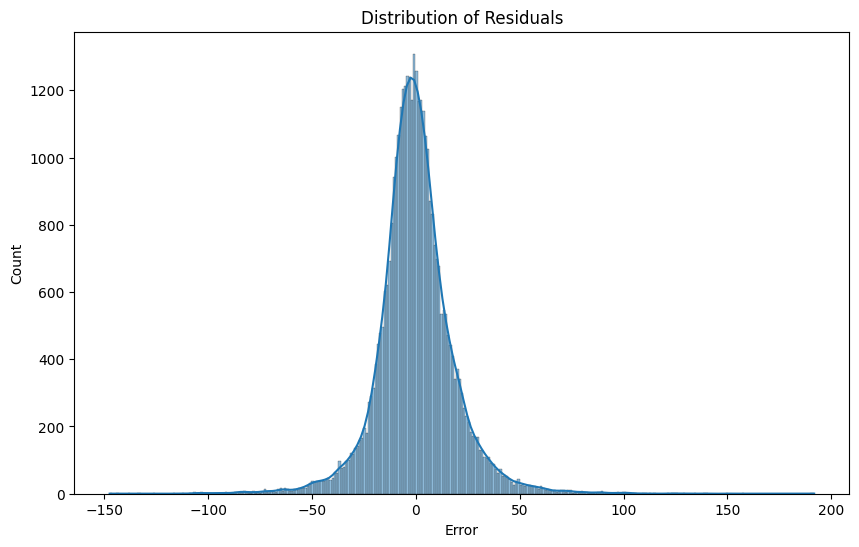

In [ ]:

residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Error")
plt.show()

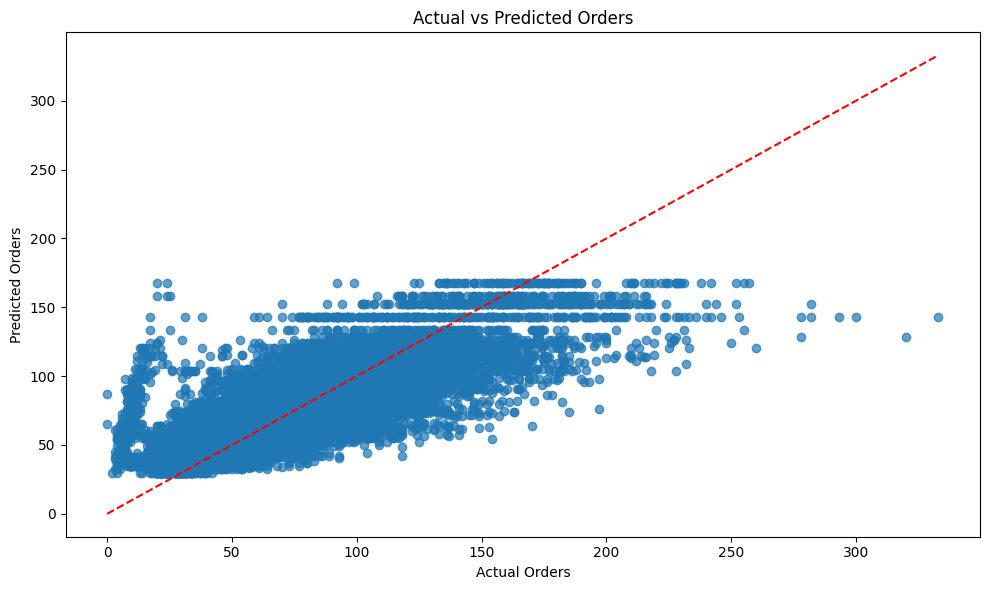

In [ ]:

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Orders")
plt.ylabel("Predicted Orders")
plt.title("Actual vs Predicted Orders")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()